In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import io
import time
plt.style.use("ggplot")

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [72]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [5]:
#Read Data
NYPropertyData = pd.read_csv('NY property data.csv')

In [6]:
#Convert to categorical
NYPropertyData['ZIP'] = NYPropertyData['ZIP'].astype('object')
NYPropertyData['EXCD1'] = NYPropertyData['EXCD1'].astype('object')
NYPropertyData['EXCD2'] = NYPropertyData['EXCD2'].astype('object')
NYPropertyData['B'] = NYPropertyData['B'].astype('object')

In [7]:
#Summary
SummaryStat = pd.DataFrame(NYPropertyData.describe())
SummaryStat

,RECORD,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2
count,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,1014730.000,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,282726.000,282732.000,87449.000,130828.000
mean,535497.500,4757.239,364.722,36.635,88.862,5.007,874264.505,85067.919,227238.169,36423.891,91186.982,23.043,39.923,246235.719,713911.436,351235.684,656768.282
std,309169.481,3676.579,853.215,74.033,76.396,8.366,11582430.991,4057260.056,6877529.306,3981575.791,6508402.819,35.580,42.707,6178962.564,11652528.948,10802212.672,16072510.172
min,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,3.000,1.000,7.000
25%,267749.250,1555.000,23.000,19.000,80.000,2.000,304000.000,9180.000,18374.000,0.000,0.000,15.000,26.000,5705.000,33912.000,2090.000,2870.000
50%,535497.500,4047.000,49.000,25.000,100.000,2.000,447000.000,13678.000,25340.000,1620.000,1620.000,20.000,39.000,20145.000,79962.500,3048.000,37062.000
75%,803245.750,6898.000,143.000,40.000,100.000,3.000,619000.000,19740.000,45438.000,1620.000,2090.000,24.000,50.000,62640.000,240551.000,31779.000,106840.750
max,1070994.000,16350.000,9978.000,9999.000,9999.000,119.000,6150000000.000,2668500000.000,4668308947.000,2668500000.000,4668308947.000,7575.000,9393.000,2371005000.000,4501180002.000,2371005000.000,4501180002.000


In [8]:
#Count missing values
MissingValueCountDF = pd.DataFrame(NYPropertyData.isnull().sum())
MissingValueCountDF

,0
RECORD,0
BBLE,0
B,0
BLOCK,0
LOT,0
EASEMENT,1066358
OWNER,31745
BLDGCL,0
TAXCLASS,0
LTFRONT,0


In [9]:
#Records that have a value
FilledRecords = NYPropertyData.count()
FilledRecords

RECORD      1070994
BBLE        1070994
B           1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [10]:
#Percent populated
NYPropertyData.count()
PercentPopulated = NYPropertyData.count()/(NYPropertyData.isnull().sum() + NYPropertyData.count())
PercentPopulated

RECORD     1.000
BBLE       1.000
B          1.000
BLOCK      1.000
LOT        1.000
EASEMENT   0.004
OWNER      0.970
BLDGCL     1.000
TAXCLASS   1.000
LTFRONT    1.000
LTDEPTH    1.000
EXT        0.331
STORIES    0.947
FULLVAL    1.000
AVLAND     1.000
AVTOT      1.000
EXLAND     1.000
EXTOT      1.000
EXCD1      0.596
STADDR     0.999
ZIP        0.972
EXMPTCL    0.015
BLDFRONT   1.000
BLDDEPTH   1.000
AVLAND2    0.264
AVTOT2     0.264
EXLAND2    0.082
EXTOT2     0.122
EXCD2      0.087
PERIOD     1.000
YEAR       1.000
VALTYPE    1.000
dtype: float64

In [11]:
#Count 0's
ZeroesDict = {}
for col in NYPropertyData.columns.tolist():
    ZeroesDict[col + "_zeroes"] = NYPropertyData[NYPropertyData[col] == 0].shape[0]
pd.DataFrame(ZeroesDict, index = [0])

,RECORD_zeroes,BBLE_zeroes,B_zeroes,BLOCK_zeroes,LOT_zeroes,EASEMENT_zeroes,OWNER_zeroes,BLDGCL_zeroes,TAXCLASS_zeroes,LTFRONT_zeroes,LTDEPTH_zeroes,EXT_zeroes,STORIES_zeroes,FULLVAL_zeroes,AVLAND_zeroes,AVTOT_zeroes,EXLAND_zeroes,EXTOT_zeroes,EXCD1_zeroes,STADDR_zeroes,ZIP_zeroes,EXMPTCL_zeroes,BLDFRONT_zeroes,BLDDEPTH_zeroes,AVLAND2_zeroes,AVTOT2_zeroes,EXLAND2_zeroes,EXTOT2_zeroes,EXCD2_zeroes,PERIOD_zeroes,YEAR_zeroes,VALTYPE_zeroes
0,0,0,0,0,0,0,0,0,0,169108,170128,0,0,13007,13009,13007,491699,432572,0,0,0,0,228815,228853,0,0,0,0,0,0,0,0


In [12]:
#Data types
NYPropertyDataDtypes = NYPropertyData.dtypes
NYPropertyDataDtypes


RECORD        int64
BBLE         object
B            object
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1        object
STADDR       object
ZIP          object
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2        object
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [13]:
UniqueValuesDict = {}
for col in NYPropertyData.columns.tolist():
     UniqueValuesDict[col + "_unique"] = len(NYPropertyData[col].unique())
    
UniqueValuesDict

{'RECORD_unique': 1070994,
 'BBLE_unique': 1070994,
 'B_unique': 5,
 'BLOCK_unique': 13984,
 'LOT_unique': 6366,
 'EASEMENT_unique': 13,
 'OWNER_unique': 863348,
 'BLDGCL_unique': 200,
 'TAXCLASS_unique': 11,
 'LTFRONT_unique': 1297,
 'LTDEPTH_unique': 1370,
 'EXT_unique': 4,
 'STORIES_unique': 112,
 'FULLVAL_unique': 109324,
 'AVLAND_unique': 70921,
 'AVTOT_unique': 112914,
 'EXLAND_unique': 33419,
 'EXTOT_unique': 64255,
 'EXCD1_unique': 130,
 'STADDR_unique': 839281,
 'ZIP_unique': 197,
 'EXMPTCL_unique': 15,
 'BLDFRONT_unique': 612,
 'BLDDEPTH_unique': 621,
 'AVLAND2_unique': 58592,
 'AVTOT2_unique': 111361,
 'EXLAND2_unique': 22196,
 'EXTOT2_unique': 48349,
 'EXCD2_unique': 61,
 'PERIOD_unique': 1,
 'YEAR_unique': 1,
 'VALTYPE_unique': 1}

In [14]:
def WithoutOutliers(col):
    Dict = {}
    Upper = NYPropertyData[col].dropna().quantile(0.975)
    Lower = NYPropertyData[col].dropna().quantile(0.025)
    NewCol = NYPropertyData.loc[(NYPropertyData[col] <= Upper) & (NYPropertyData[col] >= Lower), col]
    Dict['NewCol'] = NewCol
    Dict['Records'] = round(NewCol.shape[0]*100/NYPropertyData[col].dropna().shape[0],2)
    return Dict

In [15]:
# #Plot numerical variables
# for col in SummaryStat.columns.tolist()[1:]:
#     Column = WithoutOutliers(col)
#     sns.distplot(Column['NewCol'])
#     #plt.title(col)
#     #plt.figtext(0.5, 0.9, "No. records used - " + str(Column['Records']), horizontalalignment = 'right')
#     plt.xlabel(col + " (This pic has " + str(Column['Records']) + "% of the data)")
#     plt.ylabel('Probability Density')
#     plt.show()
#     plt.savefig('Distributions.png')

In [16]:
# #Plot categorical variables
# CategoricalVar = list(set(NYPropertyData.columns.tolist()) - set(SummaryStat.columns.tolist()))
# for elem in ['BBLE', 'PERIOD', 'YEAR', 'VALTYPE']:
#   CategoricalVar.remove(elem)
# for col in CategoricalVar:
#     DF = pd.DataFrame(NYPropertyData[col].value_counts().sort_values(ascending = False).head(15))
#     DF.plot(kind = 'bar')
#     #sns.barplot(x = DF.index, y = DF.iloc[:,0])
#     plt.ylabel('Frequency')
#     plt.xlabel(col)

In [17]:
data = NYPropertyData

# Cleaning the Data

In [17]:
#This is the cell where I just used placeholders for everything, so this cell will need to be updated later
#Filling in all of the missing values with the median
data.fillna(data.median(), inplace = True)
#For some of the fields, the median value is 0, since that causes problems because we are doing ratios and stuff, 
#Replacing all of the 0's with 1's
data = data.replace(0, 1)

In [18]:
## Functions for filling in missing values based on median(for numeric fields) and mode(for categorical fields)

def mode(group,field):
    try:
        out=pd.Series({field:group[field].mode()[0],
                      "Count":len(group)})
    except Exception:
        out=pd.Series({field:np.nan,
                      "Count":len(group)})    
    return(out)

def median(group,field):
    try:
        out=pd.Series({field:group[field].median(),
                      "Count":len(group)})
    except Exception:
        out=pd.Series({field:np.nan,
                      "Count":len(group)})    
    return(out)

def impute(data,group_results,field,groups,min_group_member):
    
    temp=data.copy()
    
    group_results.loc[group_results["Count"]<min_group_member,field]=np.nan
    
    
    temp.loc[temp[field].isna(),field] = pd.merge(temp.loc[temp[field].isna(),groups],group_results,how="left",on=groups)[field].values  
    
    print("The percentage of null values in the field {} was %2.2f %%".format(field)%(100*len(data[data[field].isna()])/len(data)))

    print("The new percentage of null values in the field {} is %2.2f %%".format(field)%(100*len(temp[temp[field].isna()])/len(temp)))
    return(temp)


In [19]:
### Example: fill in the missing values for ZIP based on the most frequent value in a block and tax class

temp=data.iloc[0:100,:] ### for testing


field="ZIP"       # Field that we want to fill in missing values for
groups=['B',"TAXCLASS"]   # List of columns that we want to group by
min_group_size=5     # minimum for acceptable number of records in a group to use it's value



group_results=temp.groupby(groups).apply( mode
                                         ,field).reset_index()      #replace mode with median for numeric fields

temp=impute(temp,group_results,field,groups,min_group_size)

The percentage of null values in the field ZIP was 0.00 %
The new percentage of null values in the field ZIP is 0.00 %


In [98]:
data = pd.read_csv('data_filled.csv')

In [99]:
start = time.time()

In [101]:
#Only keeping the columns we actually care about
data = data[['FULLVAL','AVLAND','AVTOT','LTFRONT', 'LTDEPTH','BLDFRONT','BLDDEPTH','STORIES','ZIP','TAXCLASS','B']]
data['LOTAREA'] = data['LTFRONT'] * data['LTDEPTH']
data['BLDAREA'] = data['BLDFRONT'] * data['BLDDEPTH']
data['BLDVOL'] = data['BLDAREA'] * data['STORIES']

newdata = data[['FULLVAL','AVLAND','AVTOT','LTFRONT', 'LTDEPTH','BLDFRONT','BLDDEPTH','STORIES']]


In [105]:
ZScoreDict = {}
for col in newdata.columns.tolist():
    newdata.loc[:,col + "_zscore"] = (newdata[col] - newdata[col].mean())/newdata[col].std()   

In [112]:
newdata[]

,BLDFRONT,BLDFRONT_zscore
0,132.000,2.032
1,132.000,2.032
2,709.000,14.165
3,85.000,1.043
4,89.000,1.128
5,132.000,2.032
6,16.000,-0.408
7,37.000,0.034
8,132.000,2.032
9,132.000,2.032


In [113]:
newdata.to_csv('CleanedData_withZScores.csv')

In [75]:
#Creating the ratio variables as shown in the powerpoint
count = 0
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
  for j in ['LOTAREA', 'BLDAREA', 'BLDVOL']:
    count += 1
    data["r" + str(count)] = data[i]/data[j]

In [76]:
#Just creating these variables so it is more apparent what is being grouped
data['ZIP5'] = data['ZIP']
data['ZIP3'] = data['ZIP5'].astype(str).str[:3].astype(np.int64)

In [77]:
#Creating the 45 other variables using the grouped averages
#ZIP5, ZIP3, TAXCLASS, B
for GroupByCol in ['ZIP5', 'ZIP3', 'TAXCLASS', 'B']:
  for ratio in ["r" + str(count) for count in range(1,10)]:
    data[ratio + GroupByCol] = data[ratio]/data.groupby(GroupByCol)[ratio].transform('mean')

#All    
for ratio in ["r" + str(count) for count in range(1,10)]:
  data[ratio + "avg"] = data[ratio]/data[ratio].mean()
    

In [78]:
#Only selecting the columns with numeric values so that we can do z-scoring and PCA
data = data.drop(['ZIP', 'ZIP5', 'ZIP3','TAXCLASS','B'],axis = 1)

# PCA

In [79]:
##z-scoring all of the variables
from scipy.stats import zscore
data2 = data.apply(zscore)

In [80]:
#PCA
#This is the initial PCA to see how many components we should use
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# pc = pca.fit_transform(data2)
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# plt.plot(var1)
# plt.xlabel('Principal components')
# plt.ylabel('Cumulative proportion of variance explained')

In [81]:
#Explained variance
# plt.plot(pca.explained_variance_ratio_*100)
# plt.xlabel('number of principal components')
# plt.ylabel('Explained Variance Ratio')
# plt.show()

In [82]:
#Looking at the above plot, lets use 8 PC's since that explains about 90% of the variance (can change this if you guys want)
PCAstartTime = time.time()
pca = PCA(n_components=8)
pca.fit(data2)
data3 = pca.fit_transform(data2)
data3 = pd.DataFrame(data = data3, columns = [('PC' + str(i)) for i in range(1,9)])
data3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.587,-0.064,1.596,-3.788,1.503,6.848,-2.812,1.013
1,12.668,56.483,-0.601,-1.445,-6.784,5.822,3.316,5.684
2,2.502,2.145,6.416,-9.010,3.568,12.169,4.279,-1.145
3,1.340,0.502,2.666,-4.684,1.964,7.251,-0.549,0.084
4,62.312,-2.040,-2.405,-20.071,2.187,1.452,-10.386,-16.619


In [83]:
#z-scoring again
data4 = data3.apply(zscore)

In [84]:
#For fraud score1, I took the sum of all of the absolute values as to give equal weight to all of the PC's 
#And not doing a squared sum or anything

data4['FS1'] = abs(pd.DataFrame(data4.values)).sum(axis = 1)
# data4.head()

In [85]:
#Ranking all of the FS1 so we can compare it to FS2 in an equal manner
# creating a rank column and passing the returned rank series 
data4["FS1Rank"] = data4["FS1"].rank()
PCAendTime = time.time()
# display(data4.head())
train = data4.iloc[:,:-2]

# Autoencoder

In [86]:
AutoStartTime = time.time()
#Build Autoencoder
n_col = train.shape[1]
input_dim = Input(shape = (n_col,))
encoding_dim = 6

# encoded1 = Dense(250, activation = 'relu')(input_dim)
# encoded2 = Dense(150, activation = 'relu')(encoded1)
# encoded3 = Dense(100, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(input_dim)

# decoded1 = Dense(100, activation = 'relu')(encoded4)
# decoded2 = Dense(150, activation = 'relu')(decoded1)
# decoded3 = Dense(250, activation = 'relu')(decoded2)
decoded4 = Dense(n_col, activation = 'relu')(encoded4)
autoencoder = Model(input_dim, decoded4)

In [87]:
#Compile and fit
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(train, train, epochs = 5, batch_size = 500)

Epoch 1/5
1070994/1070994 [==============================] - 2s 2us/step - loss: -0.6576
Epoch 2/5
1070994/1070994 [==============================] - 2s 2us/step - loss: -1.1545
Epoch 3/5
1070994/1070994 [==============================] - 2s 2us/step - loss: -1.2301
Epoch 4/5
1070994/1070994 [==============================] - 2s 2us/step - loss: -1.2594
Epoch 5/5
1070994/1070994 [==============================] - 2s 2us/step - loss: -1.2963


In [88]:
#Predict using autoencoder
Predicted = autoencoder.predict(train)

In [89]:
#Predicted by autoencoder
AutoencoderPredicted = pd.DataFrame(Predicted)
# AutoencoderPredicted.head(30)

In [90]:
#Computing the Fruad score 2
AutoencoderPredicted['FS2'] = ((abs(pd.DataFrame(AutoencoderPredicted.values - train.values))**2).sum(axis = 1))**(1/2)

In [91]:
#Rank by Fraud Score 2
AutoencoderPredicted["FS2rank"] = AutoencoderPredicted["FS2"].rank()
AutoEndTime = time.time()

In [92]:
# AutoencoderPredicted['FS2'].describe()

In [93]:
FinalRank = 0.5*data4['FS1Rank'] + 0.5*AutoencoderPredicted['FS2rank']
# FinalRank.sort_values(ascending = False).head(30).to_csv('TopAnomalies.csv')

In [94]:
end = time.time()
print ("Overall time:", end - start)
print ("PCA prediction time:", PCAendTime - PCAstartTime)
print ("Autoencoder prediction time:", AutoEndTime - AutoStartTime)

Overall time: 39.20128583908081
PCA prediction time: 10.85508131980896
Autoencoder prediction time: 17.02942705154419


In [42]:
TopAnomalies = FinalRank.sort_values(ascending = False).head(30)

In [43]:
NYPropertyData.iloc[TopAnomalies.index,:].to_csv('TOP_POSSIBLE_FRAUD_RECORDS.csv')

In [44]:
NYPropertyData.iloc[TopAnomalies.index,:]

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157,95,NaN,1.000,2930000.000,1318500.000,1318500.000,0.000,0.000,NaN,86-55 BROADWAY,11373.000,NaN,1,1,1201200.000,1201200.000,nan,nan,NaN,FINAL,2010/11,AC-TR
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,NaN,3.000,374019883.000,1792808947.000,4668308947.000,1792808947.000,4668308947.000,2198.000,154-68 BROOKVILLE BOULEVARD,11422.000,X4,0,0,1644454002.000,4501180002.000,1644454002.000,4501180002.000,NaN,FINAL,2010/11,AC-TR
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,NaN,nan,4326303700.000,1946836665.000,1946836665.000,1946836665.000,1946836665.000,2231.000,FLATBUSH AVENUE,NaN,X1,0,0,848484666.000,848484666.000,848484666.000,848484666.000,NaN,FINAL,2010/11,AC-TR
67128,67129,1011110001,1,1111,1,NaN,CULTURAL AFFAIRS,Q1,4,840,0,E,nan,6150000000.000,2668500000.000,2767500000.000,2668500000.000,2767500000.000,2231.000,1000 5 AVENUE,10028.000,X1,0,0,2371005000.000,2465055000.000,2371005000.000,2465055000.000,NaN,FINAL,2010/11,AC-TR
111419,111420,1015101092,1,1510,1092,NaN,BOXWOOD FLTD PARNTERS,R4,2,75,93,NaN,31.000,296508.000,22896.000,133429.000,0.000,0.000,NaN,1438 3 AVENUE,10028.000,NaN,7575,9393,22896.000,146183.000,nan,nan,NaN,FINAL,2010/11,AC-TR
585117,585118,4004200001,4,420,1,NaN,NEW YORK CITY ECONOMI,O3,4,298,402,NaN,20.000,3443400.000,1549530.000,1549530.000,0.000,0.000,NaN,28-10 QUEENS PLAZA SOUTH,11101.000,X1,1,1,1585494.000,1585494.000,nan,nan,NaN,FINAL,2010/11,AC-TR
565397,565398,3085910100,3,8591,100,NaN,DEPT OF GENERAL SERVI,V9,4,466,1009,NaN,nan,2310884200.000,1039897890.000,1039897890.000,1039897890.000,1039897890.000,2191.000,FLATBUSH AVENUE,NaN,X1,0,0,435264156.000,435264156.000,435264156.000,435264156.000,NaN,FINAL,2010/11,AC-TR
585438,585439,4004590005,4,459,5,NaN,11-01 43RD AVENUE REA,H9,4,94,165,NaN,10.000,3712000.000,252000.000,1670400.000,0.000,1418400.000,1986.000,11-01 43 AVENUE,11101.000,NaN,1,1,nan,nan,nan,nan,NaN,FINAL,2010/11,AC-TR
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1,1,NaN,2.000,836000.000,28800.000,50160.000,0.000,0.000,NaN,20 EMILY COURT,10307.000,NaN,36,45,nan,nan,nan,nan,NaN,FINAL,2010/11,AC-TR
111425,111426,1015110001,1,1511,1,NaN,969 PARK CORP,D4,2,175,193,NaN,12.000,20400000.000,4590000.000,9180000.000,228507.000,228507.000,1010.000,969 PARK AVENUE,10028.000,NaN,7538,9388,3677400.000,8400996.000,215370.000,215370.000,1017.000,FINAL,2010/11,AC-TR


In [45]:
FinalRank.to_csv('FinalRank.csv')

In [46]:
display(AutoencoderPredicted.sort_values(by = 'FS2rank', ascending = False).head(5))
display(data4.sort_values(by = 'FS1', ascending = False).head(5))

,0,1,2,3,4,5,6,7,FS2,FS2rank
917941,25.512,122.728,120.871,0.000,165.674,632.465,64.880,23.990,1028.101,1070994.000
632815,70.713,8.295,0.000,20.803,0.000,37.761,0.000,74.827,890.784,1070993.000
565391,152.484,580.988,60.630,0.000,258.207,0.000,0.000,0.000,480.599,1070992.000
67128,128.601,85.402,125.805,0.000,0.000,120.846,53.590,24.071,416.216,1070991.000
585117,84.602,41.827,43.953,0.000,0.000,80.520,39.093,116.424,373.490,1070990.000


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,FS1,FS1Rank
632815,576.528,-173.306,-558.558,265.661,355.417,53.631,63.121,121.411,2167.632,1070994.000
565391,214.484,546.948,86.105,-334.519,357.337,-245.268,-18.876,-207.560,2011.097,1070993.000
917941,441.337,-37.523,697.851,423.753,127.839,51.408,20.849,94.216,1894.775,1070992.000
111419,-0.122,0.521,12.635,-95.592,82.277,284.366,621.020,-110.589,1207.122,1070991.000
1067359,34.064,378.103,-84.738,109.748,-69.521,55.639,20.044,380.116,1131.973,1070990.000


In [47]:
set(data4.sort_values(by = 'FS1', ascending = False).head(10).index).intersection(set(AutoencoderPredicted.sort_values(by = 'FS2rank', ascending = False).head(10).index))

{67128, 111419, 565391, 565397, 585117, 632815, 917941}

(0.1, 2142886.2679053964)

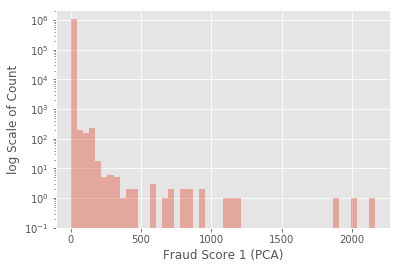

In [48]:
fig = sns.distplot(data4['FS1'].sort_values(ascending = False), kde = False)
fig.set_yscale('log')
fig.set(xlabel = 'Fraud Score 1 (PCA)', ylabel = 'log Scale of Count')
fig.set_ylim(0.1,)

(0.1, 2143146.936308063)

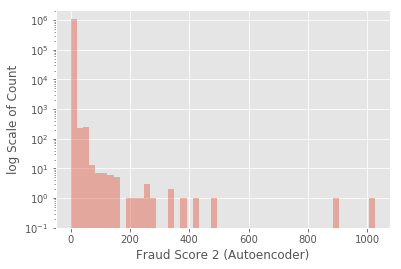

In [49]:
fig = sns.distplot(AutoencoderPredicted['FS2'].sort_values(ascending = False), kde = False)
fig.set_yscale('log')
fig.set(xlabel = 'Fraud Score 2 (Autoencoder)', ylabel = 'log Scale of Count')
fig.set_ylim(0.1,)

[Text(0,0.5,'Probability Density'), Text(0.5,0,'Final fraud rank score')]

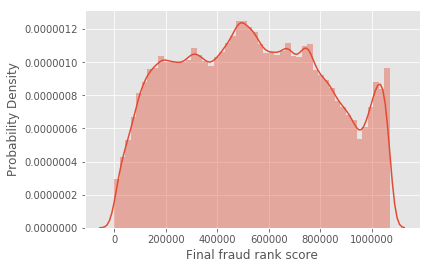

In [95]:
fig = sns.distplot(FinalRank, kde = True)
fig.set(xlabel = 'Final fraud rank score', ylabel = 'Probability Density')

In [333]:
NYPropertyData.iloc[AutoencoderPredicted.sort_values(by = 'FS2', ascending = False).head(2).index,:]

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,NaN,3.000,374019883.000,1792808947.000,4668308947.000,1792808947.000,4668308947.000,2198.000,154-68 BROOKVILLE BOULEVARD,11422.000,X4,0,0,1644454002.000,4501180002.000,1644454002.000,4501180002.000,1017.000,FINAL,2010/11,AC-TR
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157,95,NaN,1.000,2930000.000,1318500.000,1318500.000,0.000,0.000,1017.000,86-55 BROADWAY,11373.000,NaN,1,1,1201200.000,1201200.000,3048.000,37062.000,1017.000,FINAL,2010/11,AC-TR


In [329]:
data.iloc[AutoencoderPredicted.sort_values(by = 'FS2', ascending = False).head(2).index,:]

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,St_Name,Story_bucket
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.000,100.000,NaN,3.000,374019883.000,1792808947.000,4668308947.000,1792808947.000,4668308947.000,2198.000,154-68 BROOKVILLE BOULEVARD,11422.000,X4,24.000,36.000,1644454002.000,4501180002.000,1644454002.000,4501180002.000,nan,FINAL,2010/11,AC-TR,BROOKVILLE BOULEVARD,"(0, 10]"
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.000,95.000,NaN,1.000,2930000.000,1318500.000,1318500.000,0.000,0.000,nan,86-55 BROADWAY,11373.000,NaN,1.000,1.000,1201200.000,1201200.000,nan,nan,nan,FINAL,2010/11,AC-TR,BROADWAY,"(0, 10]"


In [332]:
data4.sort_values(by = 'FS1', ascending = False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,FS1,FS1Rank
632815,576.528,-173.306,-558.558,265.661,355.416,53.631,63.120,121.410,2167.629,1070994.000
565391,214.484,546.948,86.105,-334.517,357.341,-245.268,-18.870,-207.556,2011.089,1070993.000
917941,441.337,-37.523,697.851,423.753,127.838,51.408,20.848,94.215,1894.772,1070992.000
111419,-0.122,0.521,12.635,-95.592,82.277,284.366,621.020,-110.592,1207.125,1070991.000
1067359,34.064,378.103,-84.738,109.745,-69.527,55.640,20.035,380.108,1131.959,1070990.000
67128,186.398,51.551,191.110,-258.897,-259.385,-52.033,70.686,23.330,1093.391,1070989.000
585117,169.496,-42.675,90.344,-107.487,-318.440,-10.090,80.152,128.460,947.144,1070988.000
565397,389.184,-62.131,118.638,-66.312,-109.640,-15.712,-46.235,-129.384,937.237,1070987.000
230595,18.951,219.544,-53.964,59.601,-42.905,23.165,32.369,415.731,866.229,1070986.000
111425,0.007,0.970,10.349,-71.700,60.864,208.942,420.250,-71.262,844.344,1070985.000


In [330]:
NYPropertyData.iloc[data4.sort_values(by = 'FS1', ascending = False).head(2).index,:]

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157,95,NaN,1.000,2930000.000,1318500.000,1318500.000,0.000,0.000,1017.000,86-55 BROADWAY,11373.000,NaN,1,1,1201200.000,1201200.000,3048.000,37062.000,1017.000,FINAL,2010/11,AC-TR
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,NaN,2.000,4326303700.000,1946836665.000,1946836665.000,1946836665.000,1946836665.000,2231.000,FLATBUSH AVENUE,11214.000,X1,0,0,848484666.000,848484666.000,848484666.000,848484666.000,1017.000,FINAL,2010/11,AC-TR


In [97]:
data4.sort_values(by = 'FS1', ascending = False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,FS1,FS1Rank
632815,576.528,-173.306,-558.558,265.661,355.416,53.630,63.120,121.413,2167.633,1070994.000
565391,214.484,546.948,86.105,-334.518,357.339,-245.266,-18.870,-207.569,2011.099,1070993.000
917941,441.337,-37.523,697.851,423.753,127.838,51.407,20.848,94.219,1894.777,1070992.000
111419,-0.122,0.521,12.635,-95.592,82.277,284.366,621.021,-110.590,1207.124,1070991.000
1067359,34.064,378.103,-84.738,109.746,-69.524,55.636,20.034,380.129,1131.974,1070990.000
67128,186.398,51.551,191.110,-258.897,-259.382,-52.037,70.686,23.358,1093.420,1070989.000
585117,169.496,-42.675,90.344,-107.486,-318.437,-10.092,80.153,128.480,947.164,1070988.000
565397,389.184,-62.131,118.638,-66.313,-109.643,-15.708,-46.237,-129.416,937.271,1070987.000
230595,18.951,219.544,-53.964,59.601,-42.905,23.165,32.368,415.733,866.231,1070986.000
111425,0.007,0.970,10.349,-71.700,60.863,208.942,420.250,-71.264,844.345,1070985.000


In [326]:
data4.to_csv('PCAData.csv')
AutoencoderPredicted.to_csv('AutoencoderData.csv')

In [327]:
set(AutoencoderPredicted.sort_values(by = 'FS2', ascending = False).head(30).index).intersection(set(data4.sort_values(by = 'FS1', ascending = False).head(30).index))

{67128,
 85885,
 111419,
 111425,
 132748,
 149794,
 151043,
 153069,
 504001,
 556608,
 562741,
 565391,
 565397,
 585117,
 585119,
 585438,
 632815,
 641916,
 691878,
 794104,
 797935,
 917941,
 918203,
 920627,
 935157,
 1067000,
 1067359}

In [364]:
NYPropertyData.iloc[data4.sort_values(by = 'FS1', ascending = False).head(30).index,:].to_csv('TOP_FRAUD_PCA.csv')

In [ ]:
FinalRa

In [366]:
NYPropertyData.iloc[AutoencoderPredicted.sort_values(by = 'FS2', ascending = False).head(30).index,:].to_csv('TOP_FRAUD_AUTOENCODER.csv')

In [133]:
newdata.iloc[[632815,917941,565391,111419,67128,585117,585438,565397,111425,1067359]].to_csv('Top_Fraud_with_zscores.csv')

In [124]:
newdata.shape

(1070994, 24)